In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
import tensorflow as tf

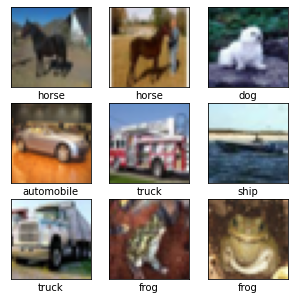

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# np.random.seed(12345)
tf.random.set_seed(12345)
class_names = ['airplane', 'automobile', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse',
              'ship', 'truck']

sample_size = 9
random_idx = np.random.randint(50000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[idx], cmap = 'gray')
    plt.xlabel(class_names[int(y_train[idx])])
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential()
#‘same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


model.compile(optimizer="Adam", loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
# model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
# model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation = 'relu'))
# model.add(tf.keras.layers.Dense(10, activation = 'softmax'))


In [ ]:
import time
start_time = time.time()
history = model.fit(x_train, y_train, epochs = 5, validation_split=0.2, batch_size = 2**5)
end_time = time.time()
print("WorkingTime: {} sec".format(end_time-start_time))

Epoch 1/5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0289 - acc: 0.6416 - val_loss: 1.0088 - val_acc: 0.6508
Epoch 2/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8651 - acc: 0.6988 - val_loss: 0.8657 - val_acc: 0.7007
Epoch 3/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7583 - acc: 0.7358 - val_loss: 0.9315 - val_acc: 0.6779
Epoch 4/5
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6824 - acc: 0.7626 - val_loss: 0.8233 - val_acc: 0.7223
Epoch 5/5
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6191 - acc: 0.7819 - val_loss: 0.8321 - val_acc: 0.7197
WorkingTime: 41.37918162345886 sec


In [ ]:
!nvidia-smi

Thu Jan  5 01:42:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |   1410MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

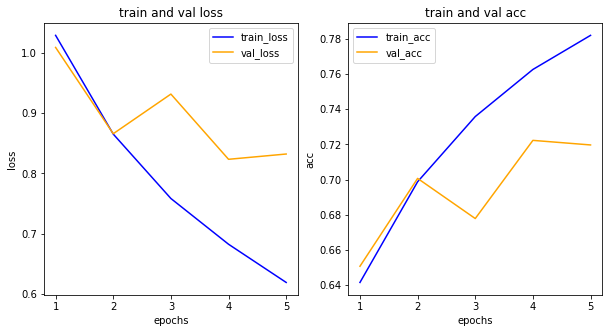

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# Dropout 을 이용한 성능개선

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_drop = tf.keras.models.Sequential()
model_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))

model_drop.add(tf.keras.layers.Dropout(0.15)) 
model_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))

model_drop.add(tf.keras.layers.Dropout(0.15))
model_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))

model_drop.add(tf.keras.layers.Dropout(0.15))
model_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_drop.add(tf.keras.layers.Flatten())

model_drop.add(tf.keras.layers.Dropout(0.3))
model_drop.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_drop.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_drop.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
history_drop = model_drop.fit(x_train, y_train,
                    epochs = 5,
                    batch_size = 32,
                    validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8039 - acc: 0.7177 - val_loss: 0.8074 - val_acc: 0.7257
Epoch 2/5
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7546 - acc: 0.7350 - val_loss: 0.7956 - val_acc: 0.7295
Epoch 3/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7066 - acc: 0.7503 - val_loss: 0.7606 - val_acc: 0.7396
Epoch 4/5
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6651 - acc: 0.7680 - val_loss: 0.7271 - val_acc: 0.7536
Epoch 5/5
1250/1250 [==============================] - 8s 6ms/step - loss: 0.6298 - acc: 0.7768 - val_loss: 0.7084 - val_acc: 0.7598


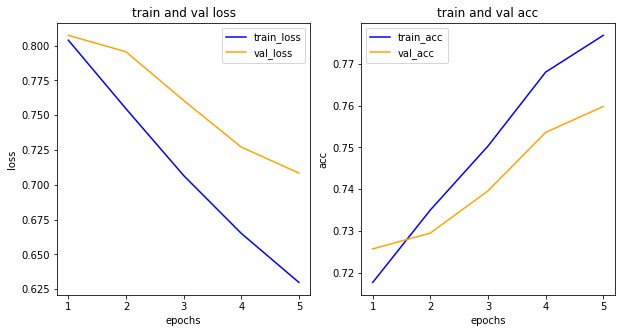

In [ ]:
import matplotlib.pyplot as plt

his_dict = history_drop.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# Batch Normalization

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_bn = tf.keras.models.Sequential()
model_bn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn.add(tf.keras.layers.Flatten())
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_bn.add(tf.keras.layers.BatchNormalization())

model_bn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_bn.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
history_bn = model_bn.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 10s 7ms/step - loss: 1.5573 - acc: 0.4586 - val_loss: 1.2741 - val_acc: 0.5567
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1011 - acc: 0.6126 - val_loss: 1.0666 - val_acc: 0.6248
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8834 - acc: 0.6903 - val_loss: 0.9865 - val_acc: 0.6572
Epoch 4/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7230 - acc: 0.7498 - val_loss: 0.9407 - val_acc: 0.6754
Epoch 5/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5999 - acc: 0.7937 - val_loss: 0.9126 - val_acc: 0.6899
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.4829 - acc: 0.8382 - val_loss: 0.9476 - val_acc: 0.6906
Epoch 7/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3882 - acc: 0.8716 - val_loss: 0.9847 - val_acc: 0.6830
Epoch 8/10
1250/1250 [==============================] - 9s 7m

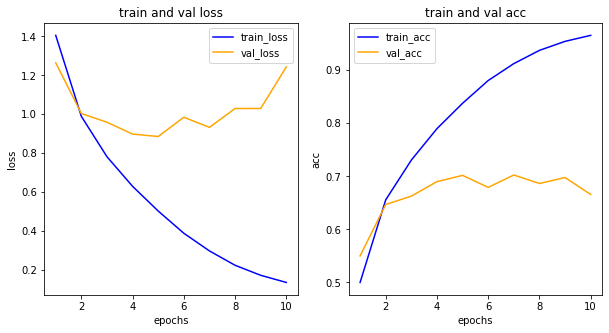

In [ ]:
import matplotlib.pyplot as plt

his_dict = history_bn.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model_bn_drop = tf.keras.models.Sequential()
model_bn_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn_drop.add(tf.keras.layers.Flatten())
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_bn_drop.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
history_bn = model_bn_drop.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 10s 7ms/step - loss: 1.8501 - acc: 0.3751 - val_loss: 1.4218 - val_acc: 0.4848
Epoch 2/15
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4352 - acc: 0.4903 - val_loss: 1.2201 - val_acc: 0.5676
Epoch 3/15
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2482 - acc: 0.5590 - val_loss: 1.1157 - val_acc: 0.6085
Epoch 4/15
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1102 - acc: 0.6077 - val_loss: 1.0220 - val_acc: 0.6471
Epoch 5/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9992 - acc: 0.6478 - val_loss: 0.9398 - val_acc: 0.6745
Epoch 6/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9046 - acc: 0.6814 - val_loss: 0.8499 - val_acc: 0.7027
Epoch 7/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8362 - acc: 0.7098 - val_loss: 0.8281 - val_acc: 0.7109
Epoch 8/15
1250/1250 [==============================] - 10s

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255., width_shift_range=0.2, height_shift_range=0.2)

batch = 32
train_xy = train_datagen.flow(x_train,y_train,batch_size = batch)
model.fit_generator(train_xy, epochs = 10)

In [ ]:
model_bn_drop = tf.keras.models.Sequential()
model_bn_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_bn_drop.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model_bn_drop.add(tf.keras.layers.Flatten())
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_bn_drop.add(tf.keras.layers.BatchNormalization())
model_bn_drop.add(tf.keras.layers.Dropout(0.15)) 

model_bn_drop.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_bn_drop.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [ ]:
# 장점
# 1. overfitting 이 적다.
# 2, 이미지를 위상에 관계없이 인식

# 단점
# 1. 정보손실발생 : pooling을 통해 이미지 데이터가 손실된다.
# 2. 연산량이 많다. weight가 많이서...
# 3. 출력값에 대해 오류가 자주 발생...